In [62]:
import scipy.stats as st 
import pandas as pd 
import random as rnd 
import numpy as np 
import matplotlib.pyplot as plt 

<Axes: ylabel='Density'>

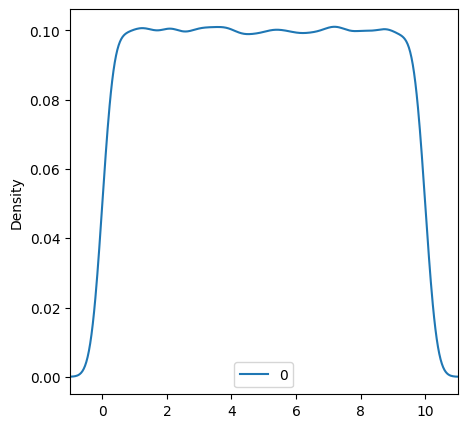

In [63]:
uniform_data = st.uniform.rvs(size= 100000, #Génère 100000 nombres aléatoires
                              loc = 0,    # De 0
                              scale = 10) # À 10
pd.DataFrame(uniform_data).plot(kind="density", figsize=(5,5),xlim=(-1,11))

In [64]:
st.uniform.cdf(x=1, loc = 0, scale = 10) #Cumulative distribution fonction (CDF) : F(X)= P(X<=x)

np.float64(0.1)

In [65]:
st.uniform.ppf(q=0.3, loc=0, scale=10) #Probability Point Function (PPF) : renvoie la valeur de x 
                                        #associée à une probabilité donnée 
                                        # dans notre cas, la probabilité de 3 est de 30% soit 0.3 

np.float64(3.0)

In [66]:
for x in range(10):
    print(st.uniform.pdf(x, loc=0, scale = 10))    

0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1


In [67]:
rnd.randint(0,10) #Renvoie un nombre entier dans un intervalle spécifié 
                  #Renvoie à la loi uniforme discrète 

0

In [68]:
rnd.random() #Renvoie un nombre réel entre 0 et 1 

0.4288890546751146

In [69]:
rnd.choice([1,2,3,4,5,6,7,8,9,10]) #Renvoie un élément choisi parmi une liste 

10

In [70]:
rnd.uniform(0,10) #Renvoie un nombre réel dans un intervalle spécificié  

0.14832446024553692

In [71]:
# .seed() permet de fixer la valeur aléatoire 
rnd.seed(10)
print(rnd.randint(1,100))

rnd.seed(10)
print(rnd.randint(1,100)) # on obtiendra la même valeur 

74
74


<Axes: ylabel='Density'>

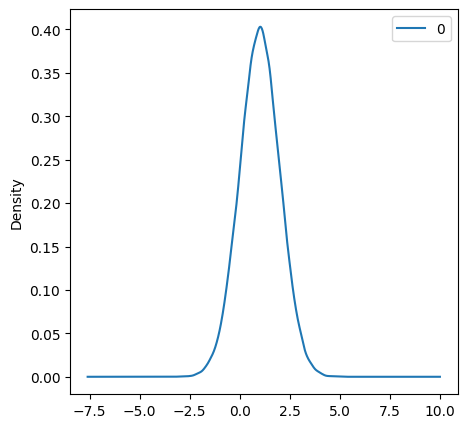

In [72]:
norm_var = st.norm.rvs(loc=1,scale=1,size = 100000)
pd.DataFrame(norm_var).plot(kind="density", figsize=(5,5))

array([[<Axes: title={'center': '0'}>]], dtype=object)

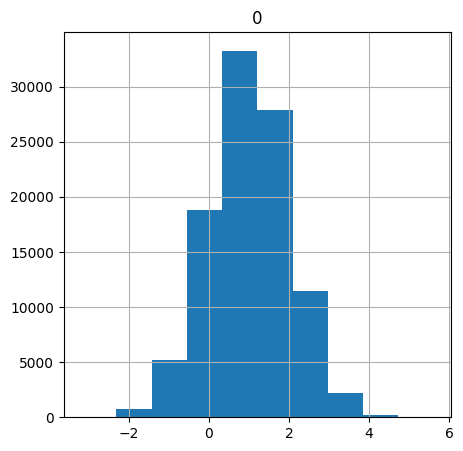

In [73]:
pd.DataFrame(norm_var).hist(figsize=(5,5))

In [74]:
print(norm_var)

[ 0.46426218 -0.39524239  2.32439537 ...  0.38498686  1.45246203
  0.07979783]


In [75]:
print(st.norm.ppf(0.025))
print(st.norm.ppf(0.975))

-1.9599639845400545
1.959963984540054


In [76]:
print(st.norm.cdf(x = -1.9599639845400545))
print(st.norm.cdf(x = 1.959963984540054))

0.024999999999999977
0.975


<Axes: ylabel='Frequency'>

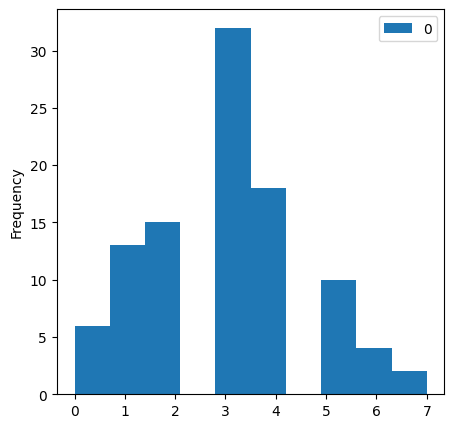

In [77]:
binom_var = st.binom.rvs(n=10, p=0.3, size= 100 )
pd.DataFrame(binom_var).plot(kind="hist",figsize=(5,5))

<Axes: ylabel='Frequency'>

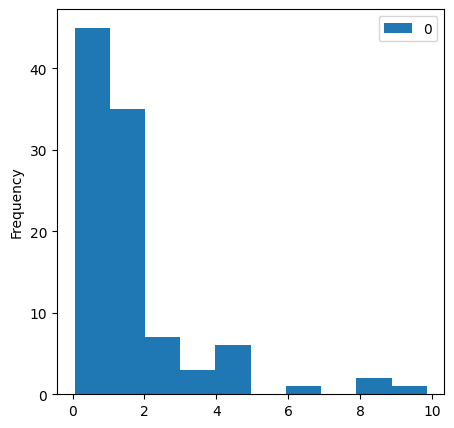

In [78]:
lognorm_var = st.lognorm.rvs(s=0.9 ,size=100)
pd.DataFrame(lognorm_var).plot(kind="hist", figsize=(5,5))

67.9336


<Axes: ylabel='Density'>

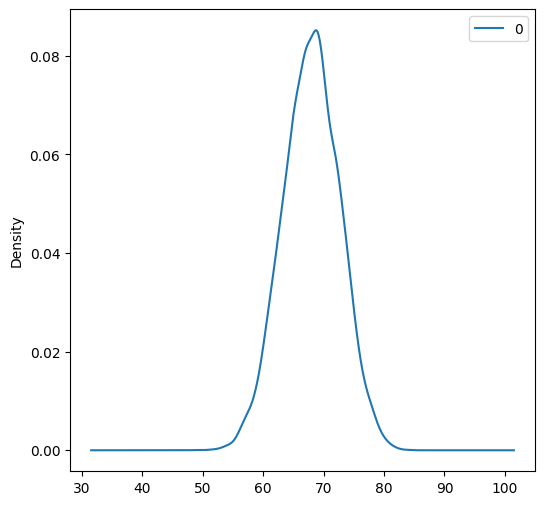

In [96]:
np.random.seed(11)

shoot = st.binom.rvs(100,0.68,loc=0,size=10000)
print(shoot.mean())
pd.DataFrame(shoot).plot(kind="kde", figsize=(6,6))

70.6


<Axes: ylabel='Density'>

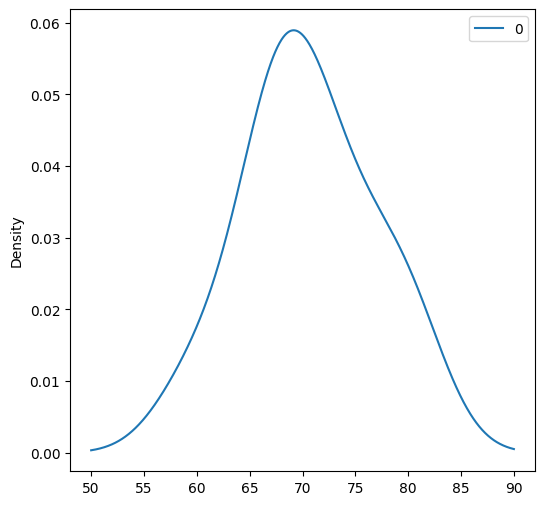

In [80]:
sample = np.random.choice(a=shoot, size= 10)
print(sample.mean())
pd.DataFrame(sample).plot(kind="kde", figsize=(6,6))

<Axes: ylabel='Density'>

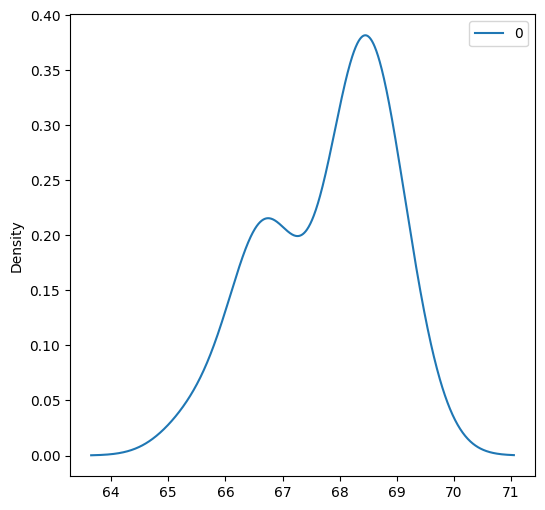

In [97]:
np.random.seed(11)

moyenne_au_shoot = []

for i in range(20):
    sample = np.random.choice(a= shoot,size=10)
    moyenne_au_shoot.append(sample.mean())

pd.DataFrame(moyenne_au_shoot).plot(kind="kde", figsize=(6,6))

In [98]:
np.random.seed(12)

interval = []
sample_mean = []
min_max = [] 

for s in range(10) :
    s = np.random.choice(a=shoot, size=10)
    sample_mean.append(s.mean())

    z = st.norm.ppf(q=0.975)
    sample_std = shoot.std()
    marge_Erreur = z * (sample_std/np.sqrt(10))

    min = s.mean() - marge_Erreur
    max = s.mean() + marge_Erreur
    interval_Confiance = (min, max)

    min_max.append((min,max))


    interval.append(interval_Confiance)

In [99]:
print(interval)
print(min_max)

[(np.float64(65.61724068745986), np.float64(71.38275931254014)), (np.float64(65.81724068745986), np.float64(71.58275931254015)), (np.float64(65.51724068745986), np.float64(71.28275931254015)), (np.float64(64.81724068745986), np.float64(70.58275931254015)), (np.float64(65.51724068745986), np.float64(71.28275931254015)), (np.float64(66.11724068745986), np.float64(71.88275931254014)), (np.float64(64.01724068745986), np.float64(69.78275931254015)), (np.float64(65.31724068745986), np.float64(71.08275931254015)), (np.float64(64.51724068745986), np.float64(70.28275931254015)), (np.float64(65.71724068745985), np.float64(71.48275931254014))]
[(np.float64(65.61724068745986), np.float64(71.38275931254014)), (np.float64(65.81724068745986), np.float64(71.58275931254015)), (np.float64(65.51724068745986), np.float64(71.28275931254015)), (np.float64(64.81724068745986), np.float64(70.58275931254015)), (np.float64(65.51724068745986), np.float64(71.28275931254015)), (np.float64(66.11724068745986), np.flo

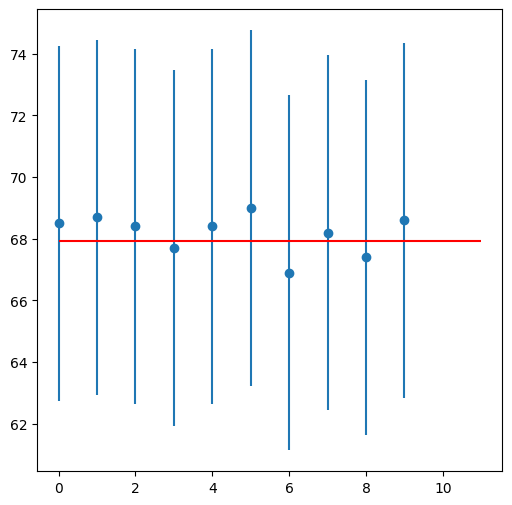

In [100]:


plt.figure(figsize=(6,6))

plt.errorbar(x=np.arange(0,10,1), y= sample_mean, yerr=[(max - min)], fmt="o")
plt.hlines(xmin=0,xmax=11,y=shoot.mean(), color="red")